# Pandas

### Questions:

  * How do I learn a new Python package?
  * How can I use pandas dataframes in my research?

### Objectives

*    Learn simple and some more advanced usage of pandas dataframes
*    Get a feeling for when pandas is useful and know where to find more information
*    Understand enough of pandas to be able to read its documentation.

Pandas is a Python package that provides high-performance and easy to use data structures and data analysis tools. This page provides a brief overview of pandas, but the open source community developing the pandas package has also created excellent documentation and training material, including:

 *   a [Getting started guide](https://pandas.pydata.org/getting_started.html) (including tutorials and a 10 minute flash intro)
 *   a "[10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html#min)" tutorial
 *   thorough [Documentation](https://pandas.pydata.org/docs/) containing a user guide, API reference and contribution guide
 *   a [cheatsheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
 *   a [cookbook](https://pandas.pydata.org/docs/user_guide/cookbook.html#cookbook).

Let’s get a flavor of what we can do with pandas. We will be working with an example dataset containing the passenger list from the Titanic, which is often used in Kaggle competitions and data science tutorials. First step is to load pandas:

In [1]:
import pandas as pd

We can download the data from [this GitHub repository](https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv) by visiting the page and saving it to disk, or by directly reading into a **dataframe**:

In [2]:
url = "https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv"
titanic = pd.read_csv(url, index_col='Name')

We can now view the dataframe to get an idea of what it contains and print some summary statistics of its numerical data:

In [17]:
# print the first 5 lines of the dataframe
titanic.head()

# print summary statistics for each column
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Ok, so we have information on passenger names, survival (0 or 1), age, ticket fare, number of siblings/spouses, etc. With the summary statistics we see that the average age is 29.7 years, maximum ticket price is 512 USD, 38% of passengers survived, etc.

Let’s say we’re interested in the survival probability of different age groups. With two one-liners, we can find the average age of those who survived or didn’t survive, and plot corresponding histograms of the age distribution:

In [18]:
print(titanic.groupby("Survived")["Age"].mean())

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64


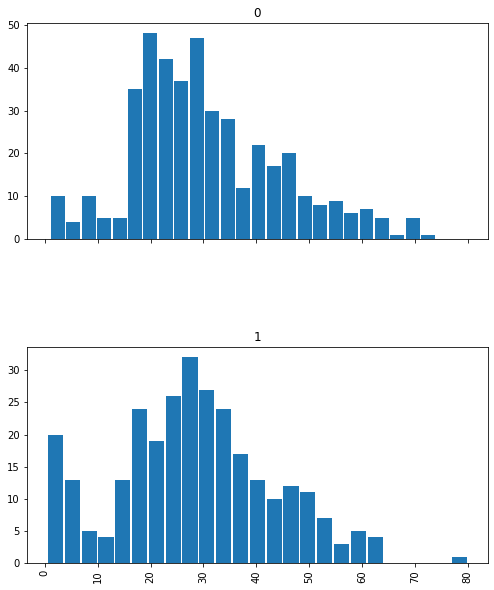

In [19]:
titanic.hist(column='Age', by='Survived', bins=25, figsize=(8,10),
             layout=(2,1), zorder=2, sharex=True, rwidth=0.9);

Clearly, pandas dataframes allows us to do advanced analysis with very few commands, but it takes a while to get used to how dataframes work so let’s get back to basics.


### ? Getting help

Series and DataFrames have a lot functionality, but how can we find out what methods are available and how they work? One way is to visit the [API reference](https://pandas.pydata.org/docs/reference/frame.html) and reading through the list. Another way is to use the autocompletion feature in Jupyter and type e.g. *titanic["Age"].* in a notebook and then hit TAB twice - this should open up a list menu of available methods and attributes.

Jupyter also offers quick access to help pages (docstrings) which can be more efficient than searching the internet. Two ways exist:

Write a function name followed by question mark and execute the cell, e.g. write *titanic.hist?* and hit SHIFT + ENTER.

Write the function name and hit SHIFT + TAB.



### What’s in a dataframe?

As we saw above, pandas dataframes are a powerful tool for working with tabular data. A pandas [DataFrame object](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) is composed of rows and columns:

![table_dataframe](https://aaltoscicomp.github.io/python-for-scicomp/_images/01_table_dataframe.svg)

Each column of a dataframe is a [series object](https://pandas.pydata.org/docs/user_guide/dsintro.html#series) - a dataframe is thus a collection of series:

In [20]:
# print some information about the columns
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, Braund, Mr. Owen Harris to Dooley, Mr. Patrick
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.5+ KB


Unlike a NumPy array, a dataframe can combine multiple data types, such as numbers and text, but the data in each column is of the same type. So we say a column is of type int64 or of type object.

Let’s inspect one column of the Titanic passanger list data (first downloading and reading the titanic.csv datafile into a dataframe if needed, see above):

In [21]:
titanic["Age"]
titanic.Age          # same as above
type(titanic["Age"])

pandas.core.series.Series

The columns have names. Here’s how to get them:

In [22]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

However, the rows also have names! This is what Pandas calls the index:

In [23]:
titanic.index

Index(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       ...
       'Markun, Mr. Johann', 'Dahlberg, Miss. Gerda Ulrika',
       'Banfield, Mr. Frederick James', 'Sutehall, Mr. Henry Jr',
       'Rice, Mrs. William (Margaret Norton)', 'Montvila, Rev. Juozas',
       'Graham, Miss. Margaret Edith',
       'Johnston, Miss. Catherine Helen "Carrie"', 'Behr, Mr. Karl Howell',
       'Dooley, Mr. Patrick'],
      dtype='object', name='Name', length=891)

We saw above how to select a single column, but there are many ways of selecting (and setting) single or multiple rows, columns and values. We can refer to columns and rows either by number or by their name:

In [48]:
#titanic.loc['Lam, Mr. Ali',"Age"]          # select single value by row and column
#titanic.loc[:'Lam, Mr. Ali',"Name":"Age"]  # slice the dataframe by row and column *names*
#titanic.iloc[0:2,3:6]                      # same slice as above by row and column *numbers*

#titanic.at['Lam, Mr. Ali',"Age"] = 42      # set single value by row and column *name* (fast)
#titanic.at['Lam, Mr. Ali',"Age"]           # select single value by row and column *name* (fast)
#titanic.at['Lam, Mr. Ali',"Age"] = 42      # set single value by row and column *name* (fast)
#titanic.iat[0,5]                           # select same value by row and column *number* (fast)

#titanic["foo"] = "bar"                     # set a whole column

Dataframes also support boolean indexing, just like we saw for numpy arrays:

In [49]:
titanic[titanic["Age"] > 70]
# ".str" creates a string object from a column
titanic[titanic.index.str.contains("Margaret")]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Devaney, Miss. Margaret Delia",45,1,3,female,19.0,0,0,330958,7.8792,NaN,Q
"Brown, Mrs. James Joseph (Margaret Tobin)",195,1,1,female,44.0,0,0,PC 17610,27.7208,B4,C
"Madigan, Miss. Margaret ""Maggie""",199,1,3,female,NaN,0,0,370370,7.7500,NaN,Q
"Fleming, Miss. Margaret",307,1,1,female,NaN,0,0,17421,110.8833,NaN,C
"Hays, Miss. Margaret Bechstein",311,1,1,female,24.0,0,0,11767,83.1583,C54,C
"Spedden, Mrs. Frederic Oakley (Margaretta Corning Stone)",320,1,1,female,40.0,1,1,16966,134.5000,E34,C
"Burns, Miss. Elizabeth Margaret",338,1,1,female,41.0,0,0,16966,134.5000,E40,C
"Ford, Miss. Doolina Margaret ""Daisy""",437,0,3,female,21.0,2,2,W./C. 6608,34.3750,NaN,S
"Murphy, Miss. Margaret Jane",613,1,3,female,NaN,1,0,367230,15.5000,NaN,Q


What if your dataset has missing data? Pandas uses the value np.nan to represent missing data, and by default does not include it in any computations. We can find missing values, drop them from our dataframe, replace them with any value we like or do forward or backward filling:

In [58]:
titanic.isna()                    # returns boolean mask of NaN values
titanic.dropna()                  # drop missing values
titanic.dropna(how="any")         # or how="all"
titanic.dropna(subset=["Cabin"])  # only drop NaNs from one column
titanic.fillna(0)                 # replace NaNs with zero
titanic.fillna(method='ffill')    # forward-fill NaNs


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,C123,S
...,...,...,...,...,...,...,...,...,...,...,...
"Montvila, Rev. Juozas",887,0,2,male,27.0,0,0,211536,13.0000,C50,S
"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,30.0000,B42,S
"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,female,19.0,1,2,W./C. 6607,23.4500,B42,S


### Tidy data

The above analysis was rather straightforward thanks to the fact that the dataset is tidy.

![tidy_data](https://aaltoscicomp.github.io/python-for-scicomp/_images/tidy_data.png)

In short, columns should be variables and rows should be measurements, and adding measurements (rows) should then not require any changes to code that reads the data.

What would untidy data look like? Here’s an example from some run time statistics from a 1500 m running event:

In [59]:
runners = pd.DataFrame([
              {'Runner': 'Runner 1', 400: 64, 800: 128, 1200: 192, 1500: 240},
              {'Runner': 'Runner 2', 400: 80, 800: 160, 1200: 240, 1500: 300},
              {'Runner': 'Runner 3', 400: 96, 800: 192, 1200: 288, 1500: 360},
          ])


What makes this data untidy is that the column names 400, 800, 1200, 1500 indicate the distance ran. In a tidy dataset, this distance would be a variable on its own, making each runner-distance pair a separate observation and hence a separate row.

To make untidy data tidy, a common operation is to “melt” it, which is to convert it from wide form to a long form:

In [60]:
runners = pd.melt(runners, id_vars="Runner",
              value_vars=[400, 800, 1200, 1500],
              var_name="distance",
              value_name="time"
          )

In this form it’s easier to **filter**, **group**, **join** and **aggregate** the data, and it’s also easier to model relationships between variables.

The opposite of melting is to pivot data, which can be useful to view data in different ways as we’ll see below.

For a detailed exposition of data tidying, have a look at this article.

### Working with dataframes

We saw above how we can read in data into a dataframe using the read_csv method. Pandas also understands multiple other formats, for example using read_excel, read_hdf, read_json, etc. (and corresponding methods to write to file: to_csv, to_excel, to_hdf, to_json, etc.)

But sometimes you would want to create a dataframe from scratch. Also this can be done in multiple ways, for example starting with a numpy array:

In [63]:
import numpy as np
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

or a dictionary:

In [67]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C': np.array([3] * 8, dtype='int32'),
                   'D': np.random.randn(8),
                   'E': np.random.randn(8)})


There are many ways to operate on dataframes. Let’s look at a few examples in order to get a feeling of what’s possible and what the use cases can be.

We can easily split and concatenate or append dataframes:

In [68]:
sub1, sub2, sub3 = df[:2], df[2:4], df[4:]
pd.concat([sub1, sub2, sub3])
sub1.append([sub2, sub3])      # same as above


,A,B,C,D,E
0,foo,one,3,-0.543907,-0.045795
1,bar,one,3,1.093761,0.036674
2,foo,two,3,-1.282401,-1.253782
3,bar,three,3,-1.313561,-0.628285
4,foo,two,3,-1.005063,0.046235
5,bar,two,3,0.778197,-0.629528
6,foo,one,3,0.508754,-0.083828
7,foo,three,3,-0.627101,0.430257


When pulling data from multiple dataframes, a powerful merge() method is available that acts similarly to merging in SQL. Say we have a dataframe containing the age of some athletes:

In [69]:
age = pd.DataFrame([
    {"Runner": "Runner 4", "Age": 18},
    {"Runner": "Runner 2", "Age": 21},
    {"Runner": "Runner 1", "Age": 23},
    {"Runner": "Runner 3", "Age": 19},
])

We now want to use this table to annotate the original runners table from before with their age. Note that the runners and age dataframes have a different ordering to it, and age has an entry for Dave which is not present in the runners table. We can let Pandas deal with all of it using the *.merge()* method:

In [70]:
# Add the age for each runner
runners.merge(age, on="Runner")

,Runner,distance,time,Age
0,Runner 1,400,64,23
1,Runner 1,800,128,23
2,Runner 1,1200,192,23
3,Runner 1,1500,240,23
4,Runner 2,400,80,21
5,Runner 2,800,160,21
6,Runner 2,1200,240,21
7,Runner 2,1500,300,21
8,Runner 3,400,96,19
9,Runner 3,800,192,19


In fact, much of what can be done in SQL [is also possible with pandas](https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_sql.html).

*groupby()* is a powerful method which splits a dataframe and aggregates data in groups. To see what’s possible, let’s return to the Titanic dataset. Let’s test the old saying “Women and children first”. We start by creating a new column Child to indicate whether a passenger was a child or not, based on the existing Age column. For this example, let’s assume that you are a child when you are younger than 12 years:

In [71]:
titanic["Child"] = titanic["Age"] < 12

Now we can test the saying by grouping the data on Sex and then creating further sub-groups based on Child:

In [72]:
titanic.groupby(["Sex", "Child"])["Survived"].mean()

Sex     Child
female  False    0.758865
        True     0.593750
male    False    0.164510
        True     0.555556
Name: Survived, dtype: float64

Here we chose to summarize the data by its mean, but many other common statistical functions are available as dataframe methods, like *std(), min(), max(), cumsum(), median(), skew(), var()* etc.

### Time series superpowers

An introduction of pandas wouldn’t be complete without mention of its special abilities to handle time series. To show just a few examples, we will use a new dataset of Nobel prize laureates:

In [74]:
nobel = pd.read_csv("../datasets/laureate.csv")
nobel.head()

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
0,1,Wilhelm Conrad,Röntgen,1845-03-27,1923-02-10,Prussia (now Germany),DE,Lennep (now Remscheid),Germany,DE,Munich,male,1901,physics,NaN,1,"""in recognition of the extraordinary services ...",Munich University,Munich,Germany
1,2,Hendrik A.,Lorentz,1853-07-18,1928-02-04,the Netherlands,NL,Arnhem,the Netherlands,NL,NaN,male,1902,physics,NaN,2,"""in recognition of the extraordinary service t...",Leiden University,Leiden,the Netherlands
2,3,Pieter,Zeeman,1865-05-25,1943-10-09,the Netherlands,NL,Zonnemaire,the Netherlands,NL,Amsterdam,male,1902,physics,NaN,2,"""in recognition of the extraordinary service t...",Amsterdam University,Amsterdam,the Netherlands
3,4,Henri,Becquerel,1852-12-15,1908-08-25,France,FR,Paris,France,FR,NaN,male,1903,physics,NaN,2,"""in recognition of the extraordinary services ...",École Polytechnique,Paris,France
4,5,Pierre,Curie,1859-05-15,1906-04-19,France,FR,Paris,France,FR,Paris,male,1903,physics,NaN,4,"""in recognition of the extraordinary services ...",École municipale de physique et de chimie indu...,Paris,France


This dataset has three columns for time, “born”/”died” and “year”. These are represented as strings and integers, respectively, and need to be converted to datetime format:

In [75]:
# the errors='coerce' argument is needed because the dataset is a bit messy
nobel["born"] = pd.to_datetime(nobel["born"], errors ='coerce')
nobel["died"] = pd.to_datetime(nobel["died"], errors ='coerce')
nobel["year"] = pd.to_datetime(nobel["year"], format="%Y")

Pandas knows a lot about dates:

In [76]:
print(nobel["born"].dt.day)
print(nobel["born"].dt.year)
print(nobel["born"].dt.weekday)

0      27.0
1      18.0
2      25.0
3      15.0
4      15.0
       ... 
970     2.0
971     NaN
972     NaN
973    18.0
974     3.0
Name: born, Length: 975, dtype: float64
0      1845.0
1      1853.0
2      1865.0
3      1852.0
4      1859.0
        ...  
970    1963.0
971       NaN
972       NaN
973    1960.0
974    1963.0
Name: born, Length: 975, dtype: float64
0      3.0
1      0.0
2      3.0
3      2.0
4      6.0
      ... 
970    2.0
971    NaN
972    NaN
973    6.0
974    1.0
Name: born, Length: 975, dtype: float64


We can add a column containing the (approximate) lifespan in years rounded to one decimal:

In [77]:
nobel["lifespan"] = round((nobel["died"] - nobel["born"]).dt.days / 365, 1)

and then plot a histogram of lifespans:

array([[<AxesSubplot:title={'center':'lifespan'}>]], dtype=object)

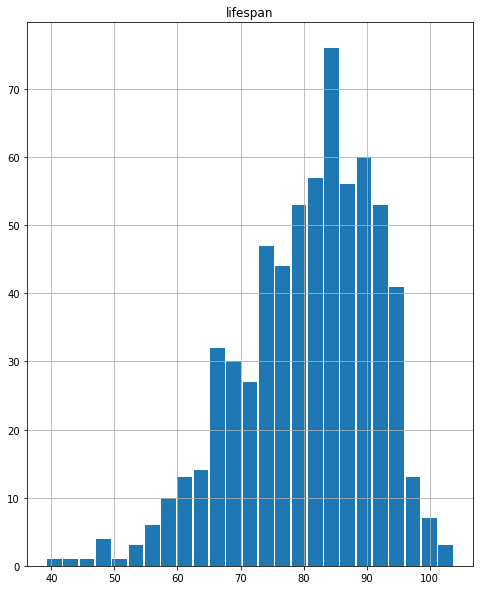

In [78]:
nobel.hist(column='lifespan', bins=25, figsize=(8,10), rwidth=0.9)

Finally, let’s see one more example of an informative plot produced by a single line of code:

<AxesSubplot:title={'center':'lifespan'}, xlabel='category'>

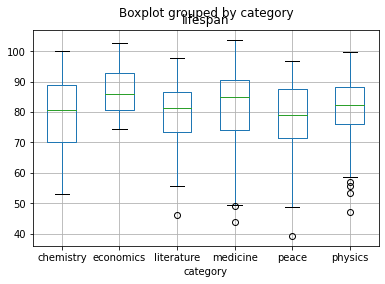

In [79]:
nobel.boxplot(column="lifespan", by="category")

### Beyond the basics

There is much more to Pandas than what we covered in this lesson. Whatever your needs are, chances are good there is a function somewhere in its [API](https://pandas.pydata.org/docs/). And when there is not, you can always apply your own functions to the data using *.apply*:

In [110]:
from functools import lru_cache

@lru_cache(maxsize=128)
def fib(x):
    """Compute Fibonacci numbers. The @lru_cache remembers values we
    computed before, which speeds up this function a lot."""
    if x < 0:
        raise NotImplementedError('Not defined for negative values')
    elif x < 2:
        return x
    else:
        return fib(x - 2) + fib(x - 1)

df = pd.DataFrame({'Generation': np.arange(100)})
df['Number of Rabbits'] = df['Generation'].apply(fib)



### Keypoints

  *  pandas dataframes are a good data structure for tabular data

  *  Dataframes allow both simple and advanced analysis in very compact form

